In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from prophet import Prophet
import statsmodels.api as sm

In [2]:
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 200)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [3]:
!pip install fredapi

In [4]:
from fredapi import Fred
fredKey='1d9f2645898e9ed1556ae8a6f84239bc'

fred = Fred(api_key=fredKey)

# Searching For Economic Data

In [5]:
spSearch=fred.search('S&P',order_by='popularity')
spSearch.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-09-02,2024-09-02,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-08-29,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-08-30 08:14:09-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-09-02,2024-09-02,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-06-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-08-27 08:12:01-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-09-02,2024-09-02,S&P 500,2014-09-02,2024-08-30,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-08-30 19:22:19-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-09-02,2024-09-02,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-09-02,2024-09-02,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-08-29,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-08-30 08:14:12-05:00,82,This data represents the effective yield of th...


# Pull Raw Data & Plot

In [6]:
sp500 = fred.get_series(series_id='SP500')
sp500.head()

2014-09-01        NaN
2014-09-02    2002.28
2014-09-03    2000.72
2014-09-04    1997.65
2014-09-05    2007.71
dtype: float64

### S&P 500 Historical Performance

The plot below represents the historical performance of the S&P 500 index. The index has shown a general upward trend, indicating long-term growth in the U.S. stock market. Key observations include:

- **Overall Growth**: The S&P 500 has increased over time, reflecting the growth in the market.
- **Economic Downturns**: Noticeable dips, such as during the early 2000s (dot-com bubble) and 2008 (financial crisis), highlight the impact of economic recessions.
- **Market Volatility**: The plot also shows periods of high volatility, underlining the inherent risks in the stock market.


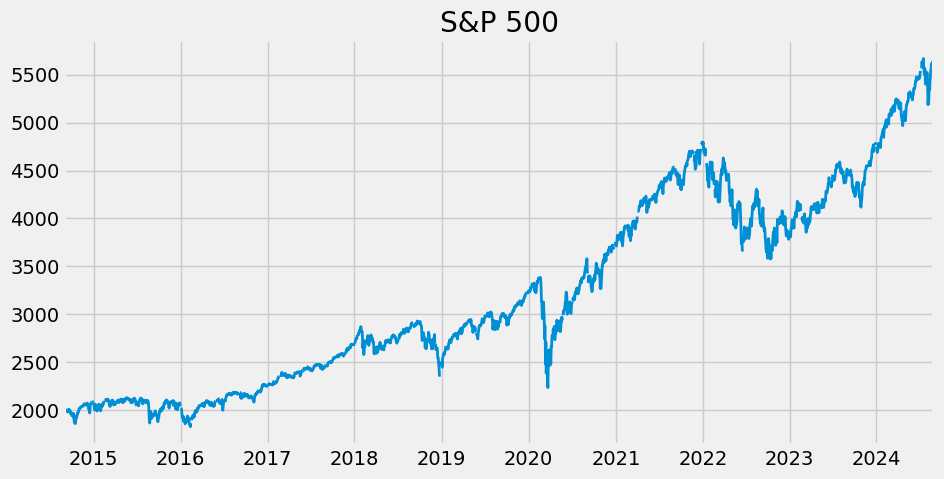

In [7]:
sp500.plot(figsize=(10,5), title='S&P 500',lw=2)
plt.show()

In [8]:
unemploymentResults = fred.search('unemployment')
unemploymentResults.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-09-02,2024-09-02,Unemployment Rate,1948-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-02 07:46:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-09-02,2024-09-02,Unemployment Rate,1948-01-01,2024-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-08-02 07:46:07-05:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2024-09-02,2024-09-02,Unemployment Level,1948-01-01,2024-07-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-08-02 07:46:03-05:00,71,The series comes from the 'Current Population ...
NROU,NROU,2024-09-02,2024-09-02,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-07-01 12:01:04-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2024-09-02,2024-09-02,Continued Claims (Insured Unemployment),1967-01-07,2024-08-17,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-08-29 07:33:04-05:00,74,"Continued claims, also referred to as insured ..."


### U.S. Monthly Unemployment Rate

The following plot displays the monthly unemployment rate in the U.S. over several decades. Key points to note include:

- **Cyclical Patterns**: The unemployment rate exhibits cycles, with significant peaks during recessions (e.g., early 1980s, early 1990s, 2008-2009).
- **Economic Impact**: The spikes in unemployment correspond to major economic downturns, such as the 2008 financial crisis and the COVID-19 pandemic.
- **Long-Term Trends**: Despite fluctuations, the unemployment rate has periods of recovery and stability, driven by economic recovery and policy interventions.


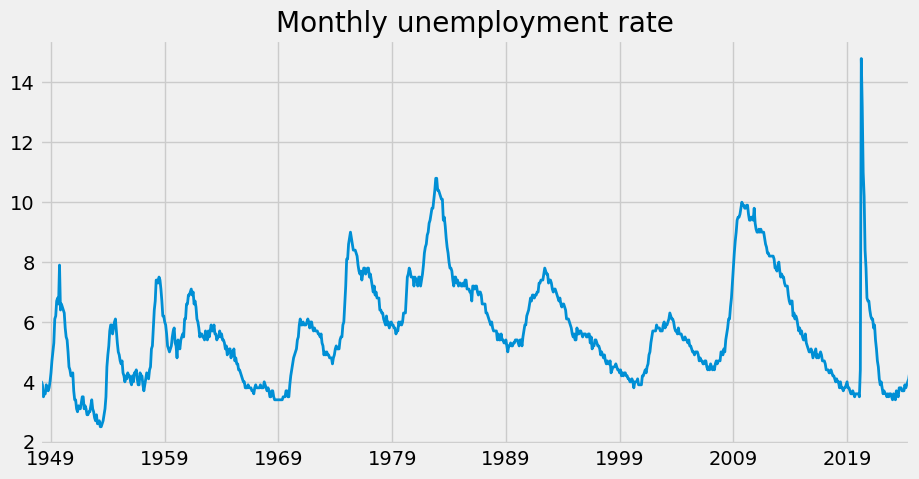

In [9]:
unRate=fred.get_series('UNRATE')
unRate.plot(figsize=(10,5),title='Monthly unemployment rate',lw=2)
plt.show()

# Pull and Join Multiple Data Series

In [10]:
unEmploymentRate =fred.search('unemployment rate state', filter=('frequency','Monthly'), order_by='popularity')
unEmploymentRate=unEmploymentRate.query('seasonal_adjustment == "Seasonally Adjusted" and units =="Percent" and id.str.len() == 4')
unEmploymentRate['popularity'] = pd.to_numeric(unEmploymentRate['popularity'])
unEmploymentRate=unEmploymentRate.loc[unEmploymentRate['title'].str.contains('Unemployment Rate')]
unEmploymentRate.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2024-09-02,2024-09-02,Unemployment Rate in California,1976-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-20 12:36:01-05:00,64,None
TXUR,TXUR,2024-09-02,2024-09-02,Unemployment Rate in Texas,1976-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-20 12:35:02-05:00,56,None
NYUR,NYUR,2024-09-02,2024-09-02,Unemployment Rate in New York,1976-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-20 12:36:02-05:00,53,None
FLUR,FLUR,2024-09-02,2024-09-02,Unemployment Rate in Florida,1976-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-20 12:36:02-05:00,51,None
PAUR,PAUR,2024-09-02,2024-09-02,Unemployment Rate in Pennsylvania,1976-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-20 12:36:03-05:00,44,None


In [11]:
allResults=[]
for myid in unEmploymentRate.index:
    results=fred.get_series(myid)
    results=results.to_frame(name=myid)
    allResults.append(results)
unEmploymentResults=pd.concat(allResults, axis=1)
unEmploymentResults.index.name = 'Date'
unEmploymentResults.head()

,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,GAUR,NCUR,COUR,WIUR,AZUR,VAUR,ILUR,SCUR,WAUR,TNUR,ORUR,WVUR,MDUR,NMUR,NVUR,MNUR,OKUR,ARUR,INUR,MOUR,AKUR,LAUR,IAUR,UTUR,NDUR,HIUR,MTUR,NJUR,PRUR,KYUR,CTUR,DCUR,MEUR,MSUR,NEUR,IDUR,RIUR,NHUR,WYUR,DEUR,VTUR,SDUR,KSUR
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,8.4,6.4,5.8,5.8,10.2,6.1,6.6,7.4,8.5,6.0,9.5,7.5,6.4,8.6,9.2,6.0,5.8,7.3,6.6,5.9,7.1,6.3,4.3,5.8,3.4,9.8,5.8,10.3,19.6,5.6,9.8,8.7,8.7,6.7,3.3,5.6,7.8,6.5,4.1,8.0,8.6,3.3,4.2
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,8.4,6.4,5.7,5.8,10.2,6.1,6.6,7.4,8.5,6.0,9.5,7.5,6.4,8.7,9.2,6.0,5.8,7.3,6.6,5.9,7.1,6.3,4.3,5.9,3.4,9.8,5.8,10.3,19.5,5.6,9.8,8.7,8.7,6.7,3.3,5.6,7.8,6.5,4.1,8.0,8.6,3.3,4.2
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,8.4,6.4,5.7,5.7,10.1,6.1,6.6,7.3,8.4,6.0,9.4,7.5,6.4,8.7,9.2,5.9,5.8,7.3,6.5,5.9,7.0,6.3,4.3,5.8,3.4,9.8,5.8,10.3,19.3,5.6,9.8,8.6,8.6,6.6,3.3,5.6,7.7,6.5,4.1,8.0,8.6,3.2,4.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,8.3,6.3,5.6,5.6,10.0,6.0,6.6,7.2,8.5,6.0,9.2,7.5,6.4,8.6,9.0,5.8,5.8,7.2,6.3,6.0,6.9,6.4,4.2,5.8,3.5,9.7,5.8,10.3,19.0,5.6,9.6,8.5,8.6,6.4,3.2,5.6,7.7,6.5,4.0,8.1,8.6,3.1,4.2
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,8.1,6.1,5.6,5.5,9.8,5.9,6.6,7.0,8.5,5.9,9.1,7.4,6.5,8.6,8.9,5.7,5.7,7.1,6.0,6.0,6.9,6.5,4.1,5.7,3.6,9.4,5.8,10.3,18.9,5.5,9.4,8.4,8.5,6.3,3.1,5.6,7.7,6.5,3.9,8.3,8.5,3.1,4.2


In [12]:
unEmploymentResults=unEmploymentResults.dropna()
idToState=unEmploymentRate['title'].str.replace('Unemployment Rate in ','').to_dict()
unEmploymentResults.columns=[idToState[c] for c in unEmploymentResults.columns]
unEmploymentResults.head()

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,Georgia,North Carolina,Colorado,Wisconsin,Arizona,Virginia,Illinois,South Carolina,Washington,Tennessee,Oregon,West Virginia,Maryland,New Mexico,Nevada,Minnesota,Oklahoma,Arkansas,Indiana,Missouri,Alaska,Louisiana,Iowa,Utah,North Dakota,Hawaii,Montana,New Jersey,Puerto Rico,Kentucky,Connecticut,the District of Columbia,Maine,Mississippi,Nebraska,Idaho,Rhode Island,New Hampshire,Wyoming,Delaware,Vermont,South Dakota,Kansas
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,8.4,6.4,5.8,5.8,10.2,6.1,6.6,7.4,8.5,6.0,9.5,7.5,6.4,8.6,9.2,6.0,5.8,7.3,6.6,5.9,7.1,6.3,4.3,5.8,3.4,9.8,5.8,10.3,19.6,5.6,9.8,8.7,8.7,6.7,3.3,5.6,7.8,6.5,4.1,8.0,8.6,3.3,4.2
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,8.4,6.4,5.7,5.8,10.2,6.1,6.6,7.4,8.5,6.0,9.5,7.5,6.4,8.7,9.2,6.0,5.8,7.3,6.6,5.9,7.1,6.3,4.3,5.9,3.4,9.8,5.8,10.3,19.5,5.6,9.8,8.7,8.7,6.7,3.3,5.6,7.8,6.5,4.1,8.0,8.6,3.3,4.2
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,8.4,6.4,5.7,5.7,10.1,6.1,6.6,7.3,8.4,6.0,9.4,7.5,6.4,8.7,9.2,5.9,5.8,7.3,6.5,5.9,7.0,6.3,4.3,5.8,3.4,9.8,5.8,10.3,19.3,5.6,9.8,8.6,8.6,6.6,3.3,5.6,7.7,6.5,4.1,8.0,8.6,3.2,4.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,8.3,6.3,5.6,5.6,10.0,6.0,6.6,7.2,8.5,6.0,9.2,7.5,6.4,8.6,9.0,5.8,5.8,7.2,6.3,6.0,6.9,6.4,4.2,5.8,3.5,9.7,5.8,10.3,19.0,5.6,9.6,8.5,8.6,6.4,3.2,5.6,7.7,6.5,4.0,8.1,8.6,3.1,4.2
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,8.1,6.1,5.6,5.5,9.8,5.9,6.6,7.0,8.5,5.9,9.1,7.4,6.5,8.6,8.9,5.7,5.7,7.1,6.0,6.0,6.9,6.5,4.1,5.7,3.6,9.4,5.8,10.3,18.9,5.5,9.4,8.4,8.5,6.3,3.1,5.6,7.7,6.5,3.9,8.3,8.5,3.1,4.2


In [13]:
px.line(unEmploymentResults,labels={
                     "Date": "TimeFrame",
                     "value": "% Unemployment",
                     "variable": "State"
                 },width=800,height=600)

# 2020 Unemployment Rate Per State

In [14]:
unEmploymentResultsPerState=unEmploymentResults[unEmploymentResults.index.isin(pd.date_range("2020-01-01", "2020-12-31"))]
px.bar(unEmploymentResultsPerState.T,labels={
                     "index": "State",
                     "value": "% Unemployment",
                     "variable": "State"
                 },orientation='h',width=800, height=600)

### Unemployment Rate by State, May 2020

In May 2020, the United States witnessed unprecedented unemployment levels due to the COVID-19 pandemic. The state-by-state analysis reveals significant disparities in the economic impact:

- **High Unemployment States**: States like Nevada and Hawaii, which are heavily dependent on tourism, entertainment, and hospitality, recorded the highest unemployment rates. These sectors were severely affected by lockdowns and travel restrictions.

- **Moderate to Low Unemployment States**: States with diversified economies or a stronger presence of essential industries (e.g., agriculture, logistics) experienced relatively lower unemployment rates. For example, Midwestern states like Nebraska and South Dakota had lower rates compared to the national average.

- **Geographic Patterns**: Coastal states and those with large urban centers generally exhibited higher unemployment rates, while many central U.S. states showed more resilience.

- **Pandemic Impact**: The varying unemployment rates underscore the differential economic impact of COVID-19 across regions. States with economies that relied more on vulnerable industries faced the greatest challenges, reflecting broader economic difficulties during the pandemic.

This analysis is critical for understanding the regional economic challenges posed by the pandemic and for guiding targeted recovery efforts.


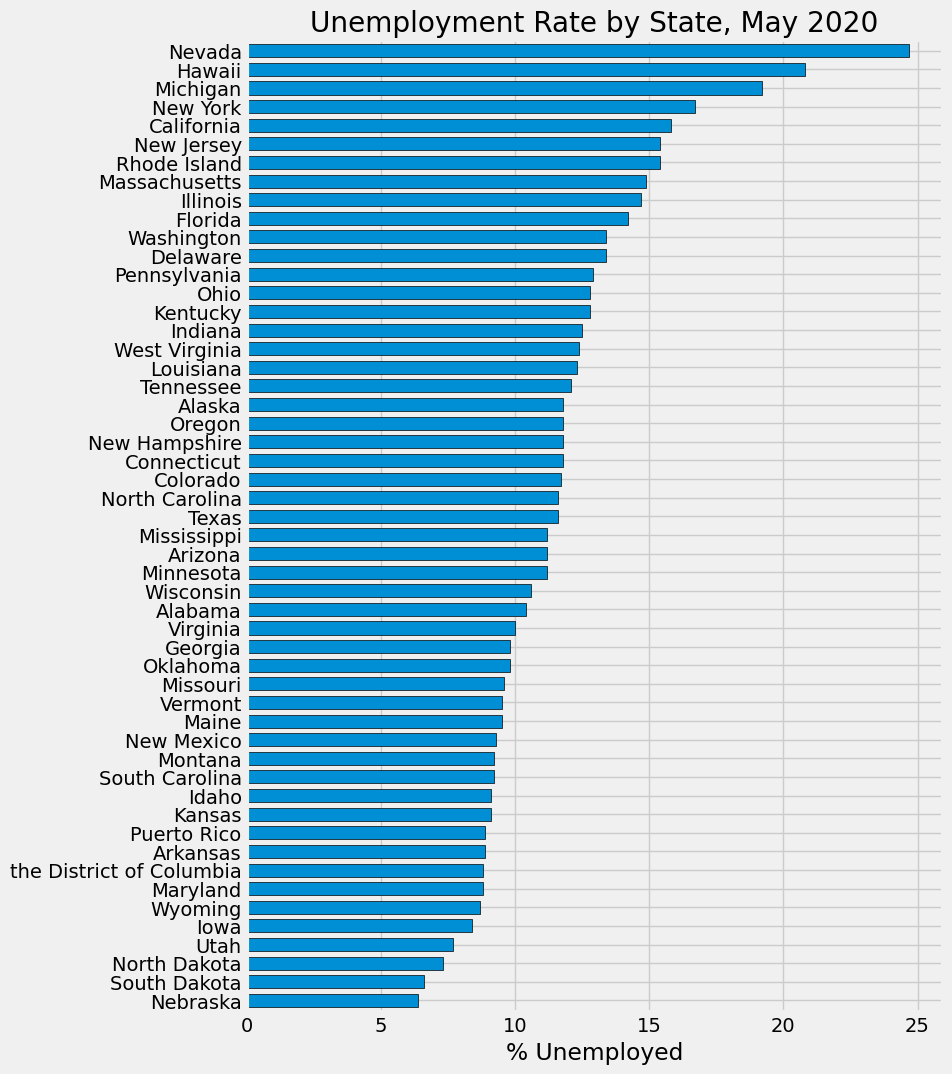

In [15]:
ax = unEmploymentResults.loc[unEmploymentResults.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

# Pull Participation Rate

In [16]:
unParticipationRate =fred.search('participation rate state', filter=('frequency','Monthly'))
unParticipationRate=unParticipationRate.query('seasonal_adjustment == "Seasonally Adjusted" and units =="Percent" and id.str.len()==7')
unParticipationRate= unParticipationRate.drop('CIVPART')
unParticipationRate.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LBSSA06,LBSSA06,2024-09-02,2024-09-02,Labor Force Participation Rate for California,1976-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-16 09:01:04-05:00,21,A state's labor-force participation rate is th...
LBSSA01,LBSSA01,2024-09-02,2024-09-02,Labor Force Participation Rate for Alabama,1976-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-16 09:01:06-05:00,13,A state's labor-force participation rate is th...
LBSSA36,LBSSA36,2024-09-02,2024-09-02,Labor Force Participation Rate for New York,1976-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-16 09:01:03-05:00,23,A state's labor-force participation rate is th...
LBSSA26,LBSSA26,2024-09-02,2024-09-02,Labor Force Participation Rate for Michigan,1976-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-16 09:01:02-05:00,22,A state's labor-force participation rate is th...
LBSSA28,LBSSA28,2024-09-02,2024-09-02,Labor Force Participation Rate for Mississippi,1976-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-16 09:01:02-05:00,21,A state's labor-force participation rate is th...


In [17]:
idToState=unParticipationRate['title'].str.replace('Labor Force Participation Rate for ','').to_dict()
allResults=[]
for myid in unParticipationRate.index:
    results=fred.get_series(myid)
    results=results.to_frame(name=myid)
    allResults.append(results)
unParticipationResults=pd.concat(allResults, axis=1)
unParticipationResults.index.name = 'Date'
unParticipationResults.columns=[idToState[c] for c in unParticipationResults.columns]
unParticipationResults.head()

,California,Alabama,New York,Michigan,Mississippi,Texas,Florida,Kentucky,Ohio,Wisconsin,Pennsylvania,Massachusetts,Minnesota,Maryland,West Virginia,Tennessee,Maine,Illinois,North Carolina,Georgia,Louisiana,South Carolina,Colorado,Utah,Virginia,Indiana,Missouri,New Jersey,Iowa,Alaska,Washington,Arizona,New Mexico,Idaho,Arkansas,Oklahoma,Nebraska,Hawaii,Nevada,Montana,Oregon,New Hampshire,Vermont,Connecticut,North Dakota,South Dakota,Kansas,Rhode Island,District Of Columbia,Delaware,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1976-01-01,62.6,57.0,58.0,61.6,58.8,63.8,55.8,60.5,61.7,65.6,58.4,64.8,65.6,64.3,52.5,59.6,62.1,63.0,66.5,63.7,56.8,65.3,67.2,62.8,65.9,64.0,60.5,61.5,64.4,69.0,60.9,59.5,60.8,63.0,57.9,59.3,64.9,69.9,71.3,62.7,62.9,65.9,63.6,64.2,62.6,64.6,65.1,63.8,64.4,62.7,65.3
1976-02-01,62.4,56.9,58.0,61.5,58.6,63.5,55.7,60.3,61.7,65.5,58.3,64.7,65.5,64.2,52.4,59.4,61.9,63.0,66.3,63.6,56.6,65.2,67.0,62.6,65.8,63.9,60.3,61.4,64.3,68.4,60.7,59.2,60.5,62.8,57.8,59.2,64.9,69.6,70.8,62.5,62.7,65.6,63.4,64.1,62.4,64.4,65.0,63.7,64.5,62.5,64.9
1976-03-01,62.2,56.8,58.0,61.5,58.5,63.4,55.5,60.2,61.7,65.4,58.3,64.6,65.4,64.1,52.3,59.3,61.9,62.9,66.2,63.5,56.5,65.0,66.8,62.5,65.6,63.8,60.3,61.4,64.2,67.8,60.6,59.1,60.3,62.7,57.7,59.1,64.8,69.6,70.5,62.4,62.5,65.6,63.2,64.0,62.3,64.4,64.9,63.6,64.5,62.5,64.7
1976-04-01,62.2,56.8,58.0,61.6,58.5,63.5,55.5,60.1,61.6,65.4,58.3,64.6,65.4,64.1,52.3,59.3,61.8,62.9,66.2,63.5,56.4,64.9,66.6,62.5,65.5,63.8,60.4,61.5,64.1,67.9,60.6,59.1,60.3,62.7,57.7,59.0,64.8,69.4,70.4,62.3,62.4,65.7,63.5,64.1,62.5,64.3,65.0,63.7,64.5,62.4,64.9
1976-05-01,62.3,56.8,58.1,61.7,58.5,63.6,55.4,60.1,61.6,65.5,58.3,64.6,65.5,64.1,52.2,59.4,61.7,63.0,66.3,63.6,56.4,64.7,66.5,62.6,65.4,63.9,60.6,61.6,64.1,67.9,60.7,59.1,60.3,62.8,57.7,59.0,64.8,69.3,70.5,62.2,62.5,66.0,63.6,64.3,62.6,64.3,65.1,63.6,64.4,62.4,65.2


In [18]:
unParticipationStates=unParticipationResults.T
unParticipationStates.shape

(51, 583)

In [19]:
unEmploymentStates=unEmploymentResults.T
unEmploymentStates.shape

(52, 581)

In [20]:
states = unEmploymentStates.loc[unEmploymentStates.index.isin(unParticipationStates.index)].index.tolist()
len(states)

50

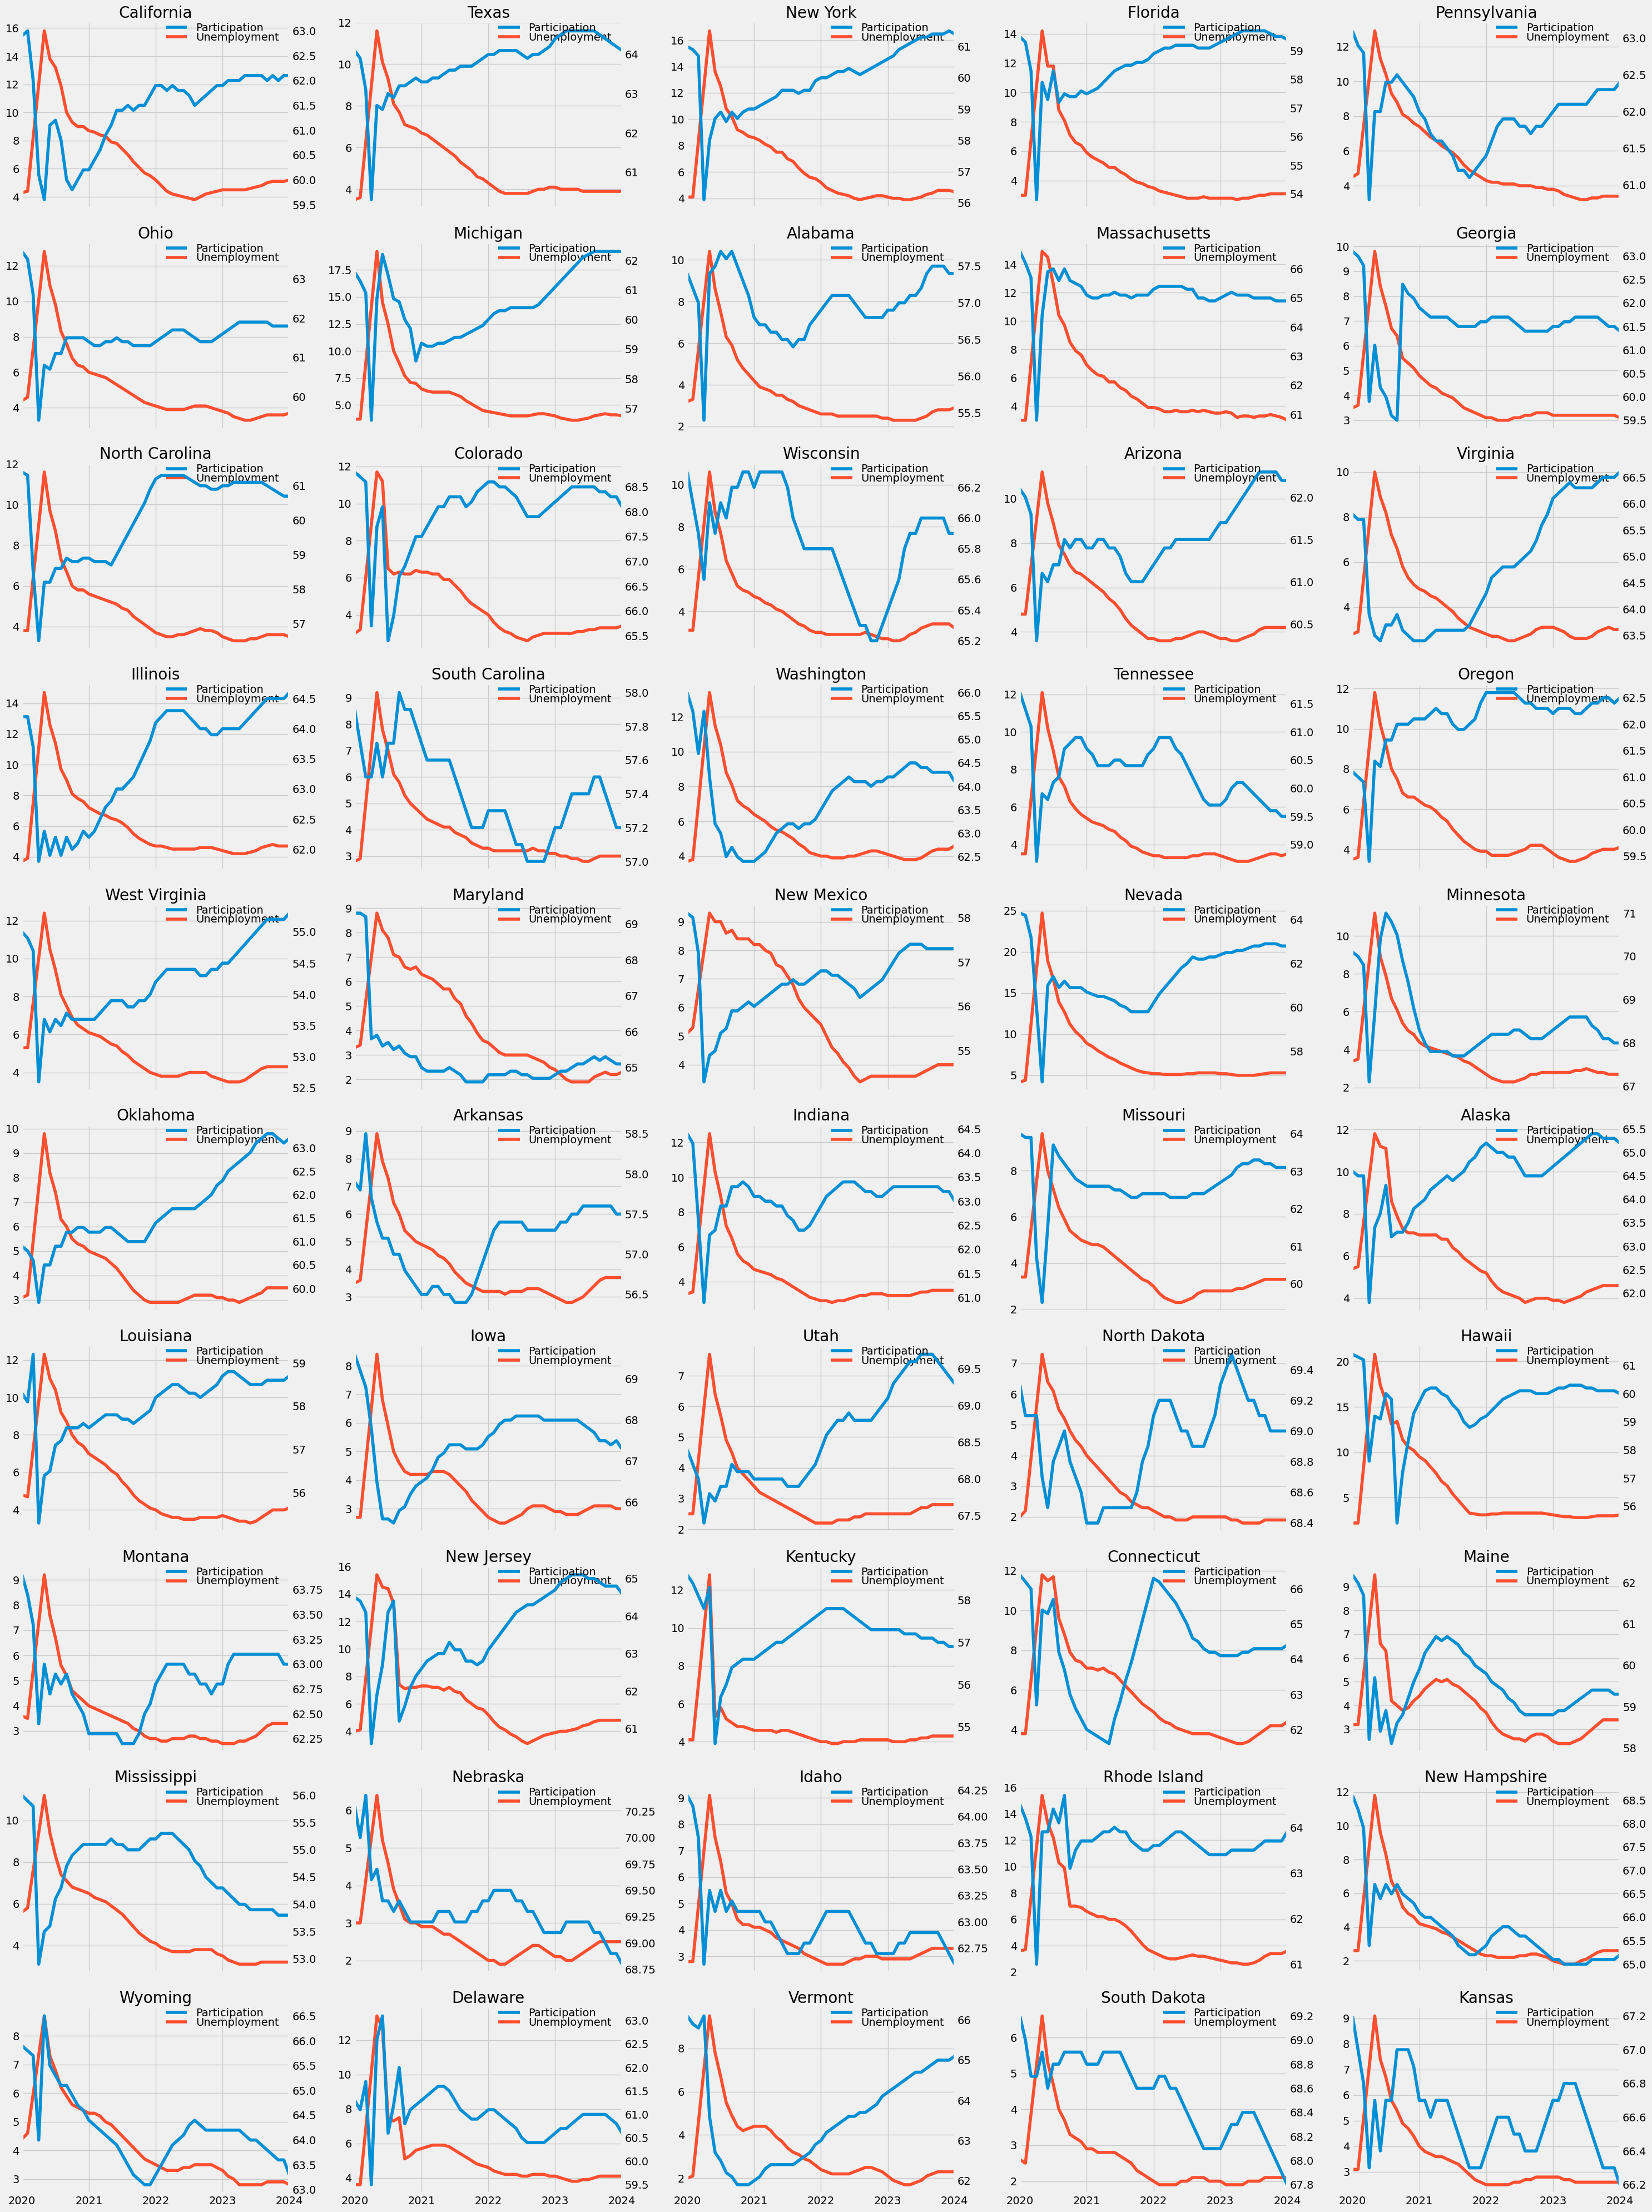

In [21]:
fig, ax = plt.subplots(10,5,figsize=(30,40),sharex=True)
ax=ax.flatten()

i=0
for state in states:
    ax[i].xaxis.label.set_visible(False)
    ax2 = ax[i].twinx()
    unParticipationResults.query('index >= 2020 and index <= 2024')[state].plot(ax=ax2, label='Participation')
    unEmploymentResults.query('index >= 2020 and index <= 2024')[state].plot(ax=ax[i], label='Unemployment',color=color_pal[1])
    ax2.grid(False)
    ax[i].legend(loc='upper left', bbox_to_anchor=(0.5, 1), frameon=False)
    ax2.legend(loc='upper left', bbox_to_anchor=(0.5, 1.05), frameon=False)
    plt.subplots_adjust(top=0.45)
    ax[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

# Models

### Prophet Model Forecast: New York Labor Force Participation Rate

The following plot represents the historical and forecasted labor force participation rate for New York using the Prophet model:

- **Long-Term Trends**: The participation rate shows a general downward trend over the decades, reflecting demographic changes such as aging populations.
- **Seasonality**: The model captures seasonal variations, with small but regular fluctuations in participation rates throughout the year.
- **Uncertainty**: As with the unemployment forecast, the prediction uncertainty increases as the forecast extends further into the future, indicated by the widening confidence intervals.
- **Recent Stabilization**: The participation rate appears to stabilize in recent years, with the model forecasting this trend to continue, albeit with slight declines.


21:31:17 - cmdstanpy - INFO - Chain [1] start processing
21:31:18 - cmdstanpy - INFO - Chain [1] done processing
/opt/conda/lib/python3.10/site-packages/prophet/forecaster.py:1796: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



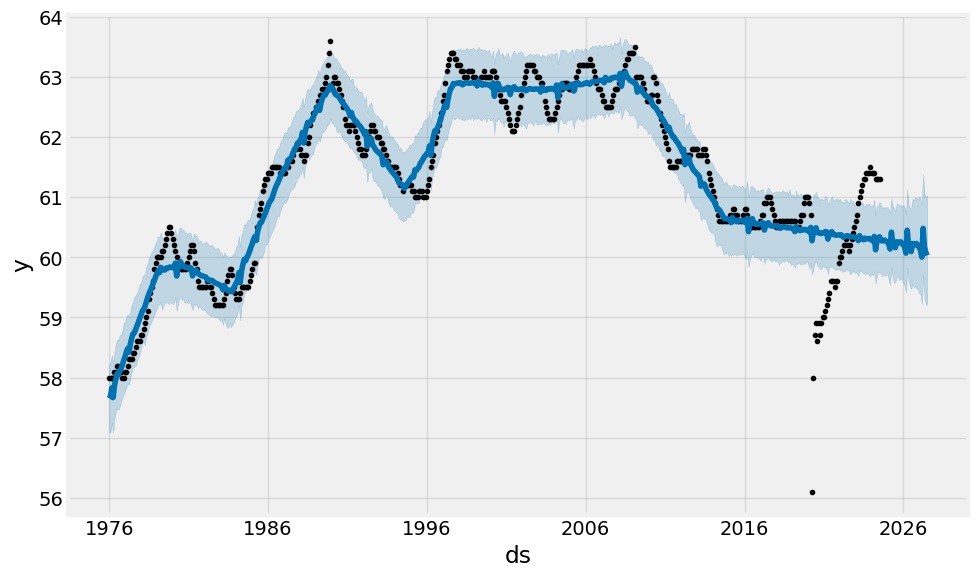

In [22]:
participation_df = unParticipationResults['New York'].reset_index()
participation_df.columns = ['ds', 'y']  # Prophet expects 'ds' for date and 'y' for the values

model_participation = Prophet()
model_participation.fit(participation_df)

future_participation = model_participation.make_future_dataframe(periods=36, freq='M')  # 36 months into the future

forecast_participation = model_participation.predict(future_participation)

model_participation.plot(forecast_participation)
plt.show()

### Prophet Model Forecast: New York Unemployment Rate

The plot below illustrates the historical and forecasted unemployment rate for New York using the Prophet model:

- **Trend Analysis**: The model forecasts a gradual decline in the unemployment rate, capturing the cyclical nature of the data.
- **Uncertainty**: The light blue shaded area represents the uncertainty interval, which widens in the future, indicating greater prediction uncertainty.
- **COVID-19 Impact**: The sharp increase in recent years likely reflects the impact of the COVID-19 pandemic, with the model predicting a subsequent recovery.


21:31:19 - cmdstanpy - INFO - Chain [1] start processing
21:31:19 - cmdstanpy - INFO - Chain [1] done processing
/opt/conda/lib/python3.10/site-packages/prophet/forecaster.py:1796: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



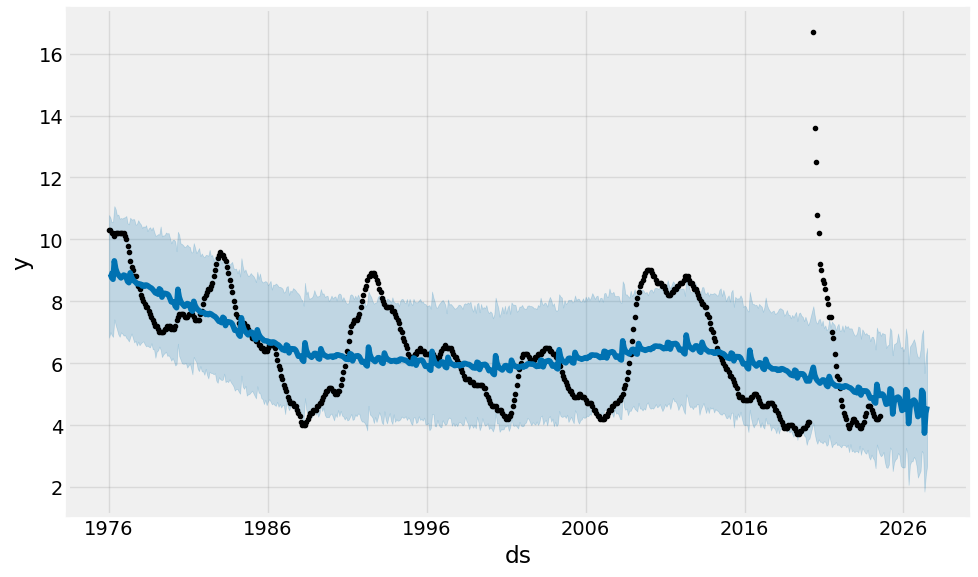

In [23]:
unemployment_df = unEmploymentResults['New York'].reset_index()
unemployment_df.columns = ['ds', 'y']  # Prophet expects 'ds' for date and 'y' for the values

model_unemployment = Prophet()
model_unemployment.fit(unemployment_df)

future_unemployment = model_unemployment.make_future_dataframe(periods=36, freq='M')  # 36 months into the future

future_unemployment = model_unemployment.predict(future_unemployment)

model_unemployment.plot(future_unemployment)
plt.show()

### ARIMAX Model Forecast: New York Unemployment Rate

The ARIMAX model is used to forecast the unemployment rate in New York, incorporating participation rates as an exogenous variable. The key insights from the plot include:

- **Stability**: The model predicts a relatively stable unemployment rate with slight fluctuations.
- **Confidence Intervals**: The forecast includes confidence intervals, which provide a range of possible outcomes, with uncertainty increasing over time.
- **Exogenous Factors**: The inclusion of participation rates helps refine the forecast by considering labor force trends alongside unemployment data.


/tmp/ipykernel_17/1083531416.py:11: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



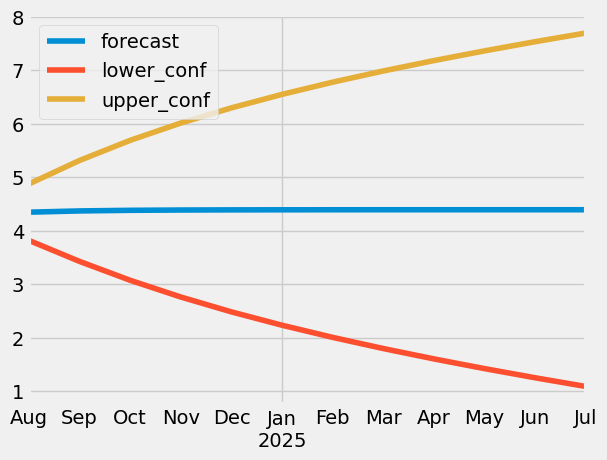

In [24]:
df = pd.concat([unParticipationResults['New York'], unEmploymentResults['New York']], axis=1)
df.columns = ['participation', 'unemployment']

exog = df['participation']
endog = df['unemployment']

model = sm.tsa.ARIMA(endog, exog=exog, order=(1, 1, 1))  # (p, d, q) - adjust these parameters based on model tuning
model_fit = model.fit()

n_periods = 12  # forecast 12 periods into the future
forecast = model_fit.get_forecast(steps=n_periods, exog=[exog[-1]] * n_periods)

forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

forecast_df = pd.DataFrame({
    'forecast': forecast_values,
    'lower_conf': conf_int.iloc[:, 0],
    'upper_conf': conf_int.iloc[:, 1]
})

forecast_df.plot()
plt.show()